In [1]:
import pandas as pd

df_fake = pd.read_csv('coin_flips.csv')

In [2]:
from random import randint
def sample_random_flips(x):
    return ''.join(str(randint(0,1)) for _ in range(len(x)))

df_real = df_fake.copy()
df_real['flips'] = df_fake['flips'].map(sample_random_flips)

In [3]:
#!pip install regex
import regex as re

def count_overlapping(text, search_for):
    return len(re.findall(search_for, text, overlapped=True))

def make_seq_column(df, seq):
    df['seq_' + seq] = df['flips'].map(lambda x: count_overlapping(x, seq)/(len(x) - len(seq) + 1))

In [ ]:
import itertools

def populate_length_n_seqs(n):
    for s in itertools.product(*([['0', '1']]*n)):
        make_seq_column(df_real, ''.join(s))
        make_seq_column(df_fake, ''.join(s))

for n in range(10):
    populate_length_n_seqs(n)

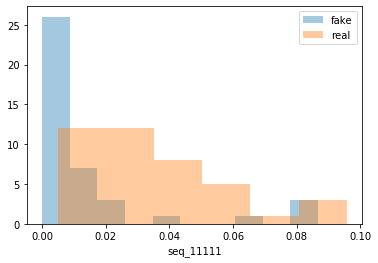

In [274]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_seq_hists(seq):
    sns.distplot(df_fake['seq_' + seq], kde=False)
    sns.distplot(df_real['seq_' + seq], kde=False)
    plt.legend(['fake', 'real'])
    plt.show()

make_seq_hists('11111')

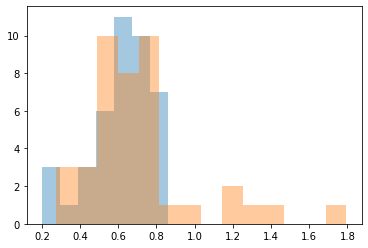

In [276]:
# these are conditional probability plots could formalize them.
# it might make sense to think of characterizing the population of fake versus population of real 
sns.distplot((df_fake['seq_001'] / df_fake['seq_00']).dropna(), kde=False)
sns.distplot((df_real['seq_001'] / df['seq_00']).dropna(), kde=False)
plt.show()

In [284]:
def get_conditional_probs(df, conditioning_seq):
    seq_count = df['seq_' + conditioning_seq] * (df['flips'].map(len)-1)
    followed_by_1 = df['seq_' + conditioning_seq + '1'] * (df['flips'].map(len)-2)
    followed_by_0 = df['seq_' + conditioning_seq + '0'] * (df['flips'].map(len)-2)
    p_1_given_conditioning_seq = followed_by_1.sum() / seq_count.sum()
    p_0_given_conditioning_seq = followed_by_0.sum() / seq_count.sum()
    return p_0_given_conditioning_seq / (p_1_given_conditioning_seq + p_0_given_conditioning_seq), \
            p_1_given_conditioning_seq / (p_1_given_conditioning_seq + p_0_given_conditioning_seq)

In [299]:
get_conditional_probs(df_real, '111111')

(0.4999292885925334, 0.5000707114074667)